In [20]:
import numpy as np

In [21]:
import pandas as pd

initial weights before training: 
[ 8.68531325e-05 -5.34958416e-05  3.08397401e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 1 1]
error: 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
0/100 : 
[ 8.68531325e-05  2.99946504e-01 -2.99969160e-01]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
1/100 : 
[8.68531325e-05 2.99946504e-01 3.08397401e-05]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/100 : 
[8.68531325e-05 2.99946504e-01 3.08397401e-05]
#

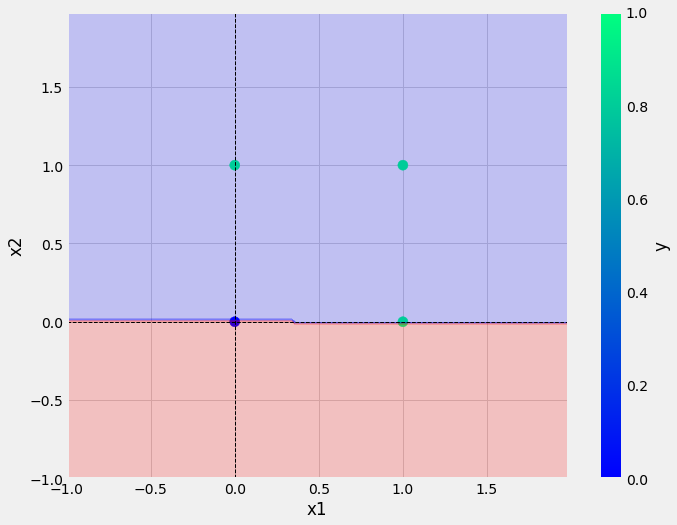

In [22]:
from utils.model import Perceptron
from utils.all_utils import prepare_data, save_plot, save_model
import pandas as pd
import logging
import os

logging_str = "[%(asctime)s: %(levelname)s: %(module)s] %(message)s"
log_dir = "logs"
os.makedirs(log_dir, exist_ok=True)
logging.basicConfig(filename= os.path.join(log_dir,"running_logs.log"),level=logging.INFO, format=logging_str, filemode="a")


def main(data, modelName, plotName, eta, epochs):
    df = pd.DataFrame(data)
    logging.info(f"This is actual dataframe{df}")
    X, y = prepare_data(df)
    model = Perceptron(eta=eta, epochs=epochs)
    model.fit(X, y)
    _ = model.total_loss()
    save_model(model, filename=modelName)
    save_plot(df, plotName, model)


if __name__ == '__main__':
    OR = {
        "x1": [0,0,1,1],
        "x2": [0,1,0,1],
        "y": [0,1,1,1],
    }
    ETA = 0.3 # 0 and 1
    EPOCHS = 100
    try:
        logging.info(">>>>> starting training >>>>>")
        main(data=OR, modelName="or.model", plotName="or.png", eta=ETA, epochs=EPOCHS)
        logging.info("<<<<< training done successfully<<<<<\n")
    except Exception as e:
        logging.exception(e)
        raise e